## Problem 1.

We are going to solve two different equations using the 
bisection method
\begin{align}
x^2 - 7x + 4 = 0\\
\cos(x^4) - e^x + 2 = 0
\end{align}
Note that we can solve the first equation analytically using the 
quadratic formula.  It is going to act as *model problem*, so 
that we can apply the algorithm to a problem that we know 
how to solve exactly before proceeding to a problem whose solution we don't 
already know.

1. Fill in definitions for the functions $f(x) = x^2 - 7x + 4$ and $g(x) = \cos(x^4) - e^x + 2.$
2. To bracket a root of the function $f(x)$, first try a few values and then plot the functions in an interval that includes a root.







In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 7*x + 4

def g(x):
    return np.cos(x**4) - np.exp(x) + 2

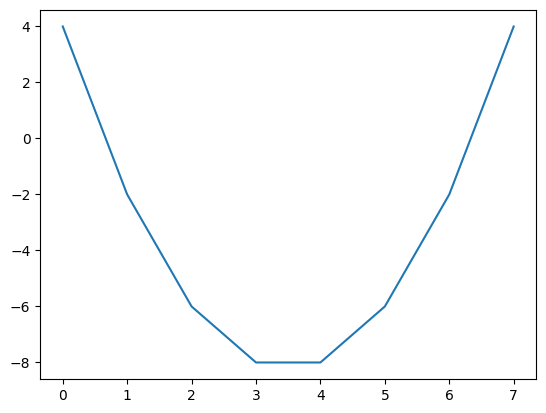

In [40]:
x = [0, 1, 2, 3, 4, 5, 6, 7]
y1 = [f(i) for i in x]

plt.plot(x, y1)
plt.show()

3. Compute the midpoint of the interval, evaluate the function at the midpoint.  Which of the two subintervals must contain a root?
4. Manually repeat the bisection process two more times.  What is our estimate for the root after each step?  For $f(x),$ compute the absolute error between the true root $r$ and the midpoint of each interval, $c_i$ for during each iteration.  Plot this as a function of the iteration number.  How does this compare to the estimates?

a=0 f(a)=4
b=2 f(b)=-6
c=1.0 f(c)=-2.0
a=0 f(a)=4
b=1 f(b)=-2
c=0.5 f(c)=0.75
a=0.5 f(a)=0.75
b=1 f(b)=-2
c=0.75 f(c)=-0.6875


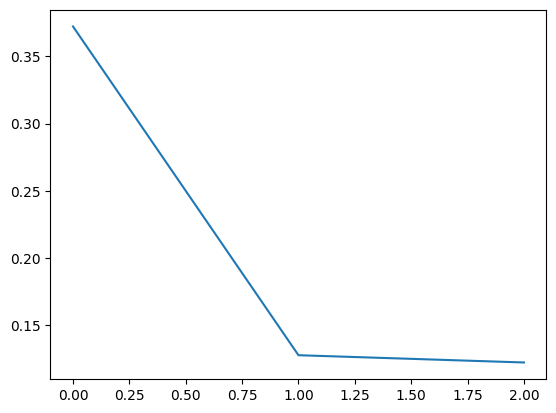

In [37]:
# Let's choose the interval [0, 2] because f(0) = 4 and f(2) = -6 and since the function is continuous, f(x) = 0 for some x in [0, 2]
# [5, 7] will also contain another root for the same reason.
absError = []
r = 0.6277186767 # the actual root of the function
a = 0
print(f'{a=} {f(a)=}')
b = 2
print(f'{b=} {f(b)=}')
c = (a+b)/2
print(f'{c=} {f(c)=}')
absError.append(abs(c-r))
# our estimate at this point will be c = 1

a = 0
print(f'{a=} {f(a)=}')
b = 1
print(f'{b=} {f(b)=}')
c = (a+b)/2
print(f'{c=} {f(c)=}')
absError.append(abs(c-r))
# our estimate at this point will be c = 0.5

a = 0.5
print(f'{a=} {f(a)=}')
b = 1
print(f'{b=} {f(b)=}')
c = (a+b)/2
print(f'{c=} {f(c)=}')
absError.append(abs(c-r))
# our estimate at this point will be c = 0.75

plt.plot([0, 1, 2], absError)
plt.show()

# If we use the midpoint after each iteration as an estimate, we can see the error get smaller and smaller as we go on. Therefore, our answer gets more accurate the more iterations we have.


5. Implement the bisection method below.  You can find pseudocode in Sauer, Section 1.1
6. Repeat the above for $g(x).$  How many iterations of the bisection method would we need to find a root of $g(x)$ so that the error is less than $10^{-8}$?

In [45]:
def bisection(f,a,b,TOL):
    
    # Fill in code here
    mid = (a+b)/2
    while abs(f(mid)) > TOL:
        mid = (a+b)/2
        if f(a)*f(mid) < 0:
            b = mid
        else:
            a = mid
    
    return mid

# a modified bisection method to keep track of iterations to help answer question 6
def bisection2(f,a,b,TOL):
    iterations = 0
    # Fill in code here
    mid = (a+b)/2
    while abs(f(mid)) > TOL:
        iterations += 1
        mid = (a+b)/2
        if f(a)*f(mid) < 0:
            b = mid
        else:
            a = mid
    
    return (mid, iterations)

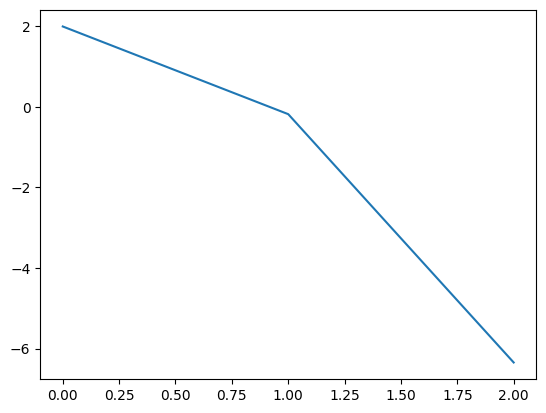

a=0 g(a)=np.float64(2.0)
b=2 g(b)=np.float64(-6.346715579254035)
c=1.0 g(c)=np.float64(-0.17797952259090533)
a=0 g(a)=np.float64(2.0)
b=1 g(b)=np.float64(-0.17797952259090533)
c=0.5 g(c)=np.float64(1.349326239999971)
a=0.5 g(a)=np.float64(1.349326239999971)
b=1 g(b)=np.float64(-0.17797952259090533)
c=0.75 g(c)=np.float64(0.8333597429139752)


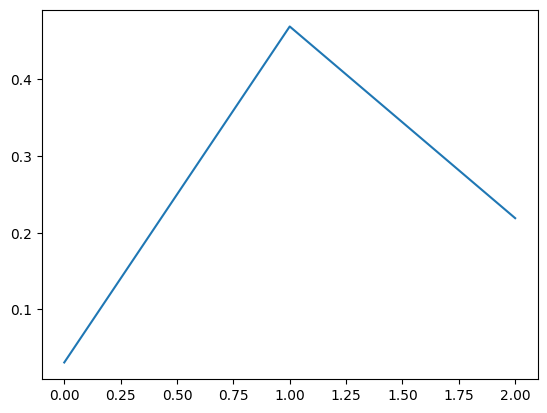

29


In [47]:
x = [0, 1, 2]
y1 = [g(i) for i in x]

plt.plot(x, y1)
plt.show()
# as we can see from the plot, the function has a root in the interval [0, 2] because g(0) is positive  and g(2) is negative, and the function is continuous.

absError = []
r = 0.9691051 # the actual root of the function
a = 0
print(f'{a=} {g(a)=}')
b = 2
print(f'{b=} {g(b)=}')
c = (a+b)/2
print(f'{c=} {g(c)=}')
absError.append(abs(c-r))
# our estimate at this point will be c = 1

a = 0
print(f'{a=} {g(a)=}')
b = 1
print(f'{b=} {g(b)=}')
c = (a+b)/2
print(f'{c=} {g(c)=}')
absError.append(abs(c-r))
# our estimate at this point will be c = 0.5

a = 0.5
print(f'{a=} {g(a)=}')
b = 1
print(f'{b=} {g(b)=}')
c = (a+b)/2
print(f'{c=} {g(c)=}')
absError.append(abs(c-r))
# our estimate at this point will be c = 0.75

plt.plot([0, 1, 2], absError)
plt.show()
# the error here also decreases as we iterate more. However it seems that it is not guaranteed that the error will decrease after each iteration. We see that out estimate at c = 1 is closest to the actual root, but as more iterations are done, the error will eventually decrease.

iterations = bisection2(g, 0, 2, 0.00000001)[1]
print(iterations)
# it turns out that it takes 29 iterations from a=0 and b=2 to get an estimate that is within 10^-8 of the actual root.

## Problem 2

Is the bisection method foolproof?  Try the following function:
$$h(x) =  x^5 - 5 x^4 + 10 x^3 - 10 x^2 +5 x- 1$$
By inspection, $x = 1$ is the unique root, since $h(x)$ is equal to $(x-1)^5$.  Try finding the root using bisection with the 
starting interval $[0, 1.5]$ and a tolerance of $10^{-8}.$  Note, you should code $h(x)$ using the first, expanded expression.

In [48]:
def h(x):
    return x**5 - 5*x**4 + 10*x**3 - 10*x**2 + 5*x - 1

bisectionRoot = bisection(h, 0, 1.5, 0.00000001)
print(bisectionRoot)

# the bisection method is not foolproof as it never arrives at 1, our function returns 0.984375 instead.

0.984375


## Problem 3. 

Suppose that the Bisection Method with starting interval $[-2, 1]$ is used to find a root of the function $f(x) = 1/x.$  Does the method converge to a real number?  Is it the root?

In [49]:
def p(x):
    return 1/x

ans = bisection(p, -2, 1, 0.00000001)
print(ans)
# the method does not converge to a real number, it appears that somewhere along the way, an iteration of the bisection method divides by zero (as a result of using this function p)
# To be fair, the function p is not continuous at x = 0, so the bisection method is not guaranteed to work in this case as it only works for real numbers.

ZeroDivisionError: float division by zero

## Problem 4. 

(From Sauer, Problem 1.1.7)  Use the Bisection method to find the
two real numbers x, within six correct decimal places, that make the determinant of the matrix
$$
A = \begin{bmatrix}
1 & 2 & 3 & x \\
4 & 5 & x & 6 \\
7 & x & 8 & 9 \\
x & 10 & 11 & 12
\end{bmatrix}
$$
equal to 1000.  For each solution you find, test
it by computing the corresponding determinant and reporting how many correct decimal places (after the decimal point) the determinant has when your solution $x$ is used.  (This is called the ``backward error''.)  You may use the numpy function `np.linalg.det`.

In [61]:
import numpy as np
def getDeterminant(x):
    A = np.array([
        [1, 2, 3, x],
        [4, 5, x, 6],
        [7, x, 8, 9],
        [x, 10, 11, 12]
    ])
    return np.linalg.det(A)

def matrixBisection(f, a, b, TOL, target):
    mid = (a+b)/2
    while abs(f(mid) - target) > TOL:
        mid = (a+b)/2
        cur = f(mid)
        if (f(a) - target)*(cur - target) < 0:
            b = mid
        else:
            a = mid
    
    return mid

# find the first root
ans1 = matrixBisection(getDeterminant, 0, 10, 0.00000001, 1000)
print(ans1)
print(getDeterminant(ans1))
# the determinant of the matrix is 1000 when x = 9.708299123249162


# find the second root
ans2 = matrixBisection(getDeterminant, -20, -10, 0.00000001, 1000)
print(ans2)
print(getDeterminant(ans2))
# the determinant of the matrix is 1000 when x = -17.18849815108797


9.708299123249162
999.9999999932354
-17.18849815108797
999.9999999912086
